# Fit Data Using Linear Regression Tensorflow

## Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Generate data between 0-10 with random noise using numpy

In [2]:
X_data = np.linspace(0,10,10) + np.random.uniform(-1,1,10)

X_data

array([ 0.76543141,  0.31082459,  1.52011108,  4.06942977,  4.33961564,
        5.07859803,  6.82062404,  8.56138523,  9.14317017, 10.10086272])

In [3]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1,1,10)

y_label

array([-0.74192732,  1.43845561,  1.56746036,  3.05660122,  3.77406935,
        6.0302217 ,  6.12334073,  8.36205154,  9.81787058,  9.178086  ])

## Plot a graph: X(data) $ \rightarrow $ Y(label)

Text(0,0.5,'Labels')

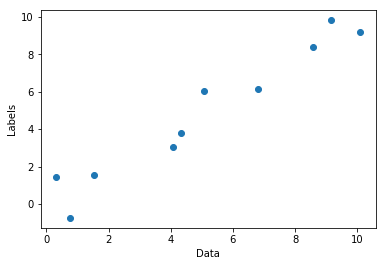

In [4]:
plt.plot(X_data, y_label, 'o')
plt.xlabel('Data')
plt.ylabel('Labels')

## In this graph $ \uparrow $, we can see some linearity or plot a hypothetical line passing through 0 to 10.

## Using tensorflow we have to draw this line.

## General equation of any line is: $ y = mx + c $

### Here $ m $ is the slope of a line and $ c $ is the y-intercept of this line.

## For this we'll declare tensorflow variables

In [5]:
random_num_arr = np.random.rand(2)

random_num_arr

array([0.60179018, 0.5607881 ])

In [6]:
# Slope
m = tf.Variable(random_num_arr[0])

# Y-Intercept
c = tf.Variable(random_num_arr[1])

## Now we'll initially set `error = 0` and predict the value of $ y $.

## After that we'll compare this predicted value with real $ y $ value and get the Mean Square Error.

In [7]:
error = 0

for x,y in zip(X_data, y_label):
    
    y_pred = m*x + c
    
    error += (y - y_pred)**2

## Gradient Descent Optimizer to optimize and then train data.

### Learning Rate: $ 0.001 $

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

train = optimizer.minimize(error)

## Initializing Tensorflow variable initializer

In [9]:
init = tf.global_variables_initializer()

## Running our code within tensorflow Session

In [10]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 1 # Number of Iterations or training steps
    
    for i in range(epochs):
        
        sess.run(train)
        
    final_slope, final_y_intercept = sess.run([m,c])

## Taking original test data to plot the line $ y = mx + c $

In [15]:
X_test = np.linspace(-1,11,10)  # test data

# y = m*x + c
y_pred_plot = final_slope * X_test + final_y_intercept

## Plotting the Graph of original data and a line passing through that data.

In [ ]:
plt.plot(X_data, y_label, 'o')

plt.plot(X_test, y_pred_plot, 'r')